# Boom Bikes Linear Regression Modelling

# Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

# Step 1 : Read / Understand the data

In [75]:
#Import Pandas and numpy package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [76]:
# Read the CSV file and display some records
bBike = pd.read_csv("day.csv")
bBike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [77]:
#Shape of the data sheet
bBike.shape

(730, 16)

In [78]:
#Summary of the data set
bBike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [79]:
# Data Type of the each col.
bBike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [80]:
# Checking null value of the data set
bBike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##### We didn't find any null attribute into the data set

In [81]:
# Display Index / Col. Name
bBike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [82]:
# Rename the col. name for meanful 
bBike.rename(columns={'yr':'year','mnth':'month','hum':'humidity','cnt':'count'}, inplace = True)

In [83]:
#Change the index name as per the document 
bBike.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [84]:
# Change the date formate from object to date and time formate
bBike["dteday"] = pd.to_datetime(bBike["dteday"])
bBike.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [85]:
# Fetch the details for each col.
bBike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   year        730 non-null    int64         
 4   month       730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  humidity    730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  count       730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [86]:
# Map season, month, weathersit, weekday variable 

bBike['season']=bBike.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
bBike['month']=bBike.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bBike['weathersit']=bBike.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
bBike['weekday']=bBike.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

bBike.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2018-01-01,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Step 2 :  Data Visualisation 

######  Plot pairplot  to know that which plot is more correlated 

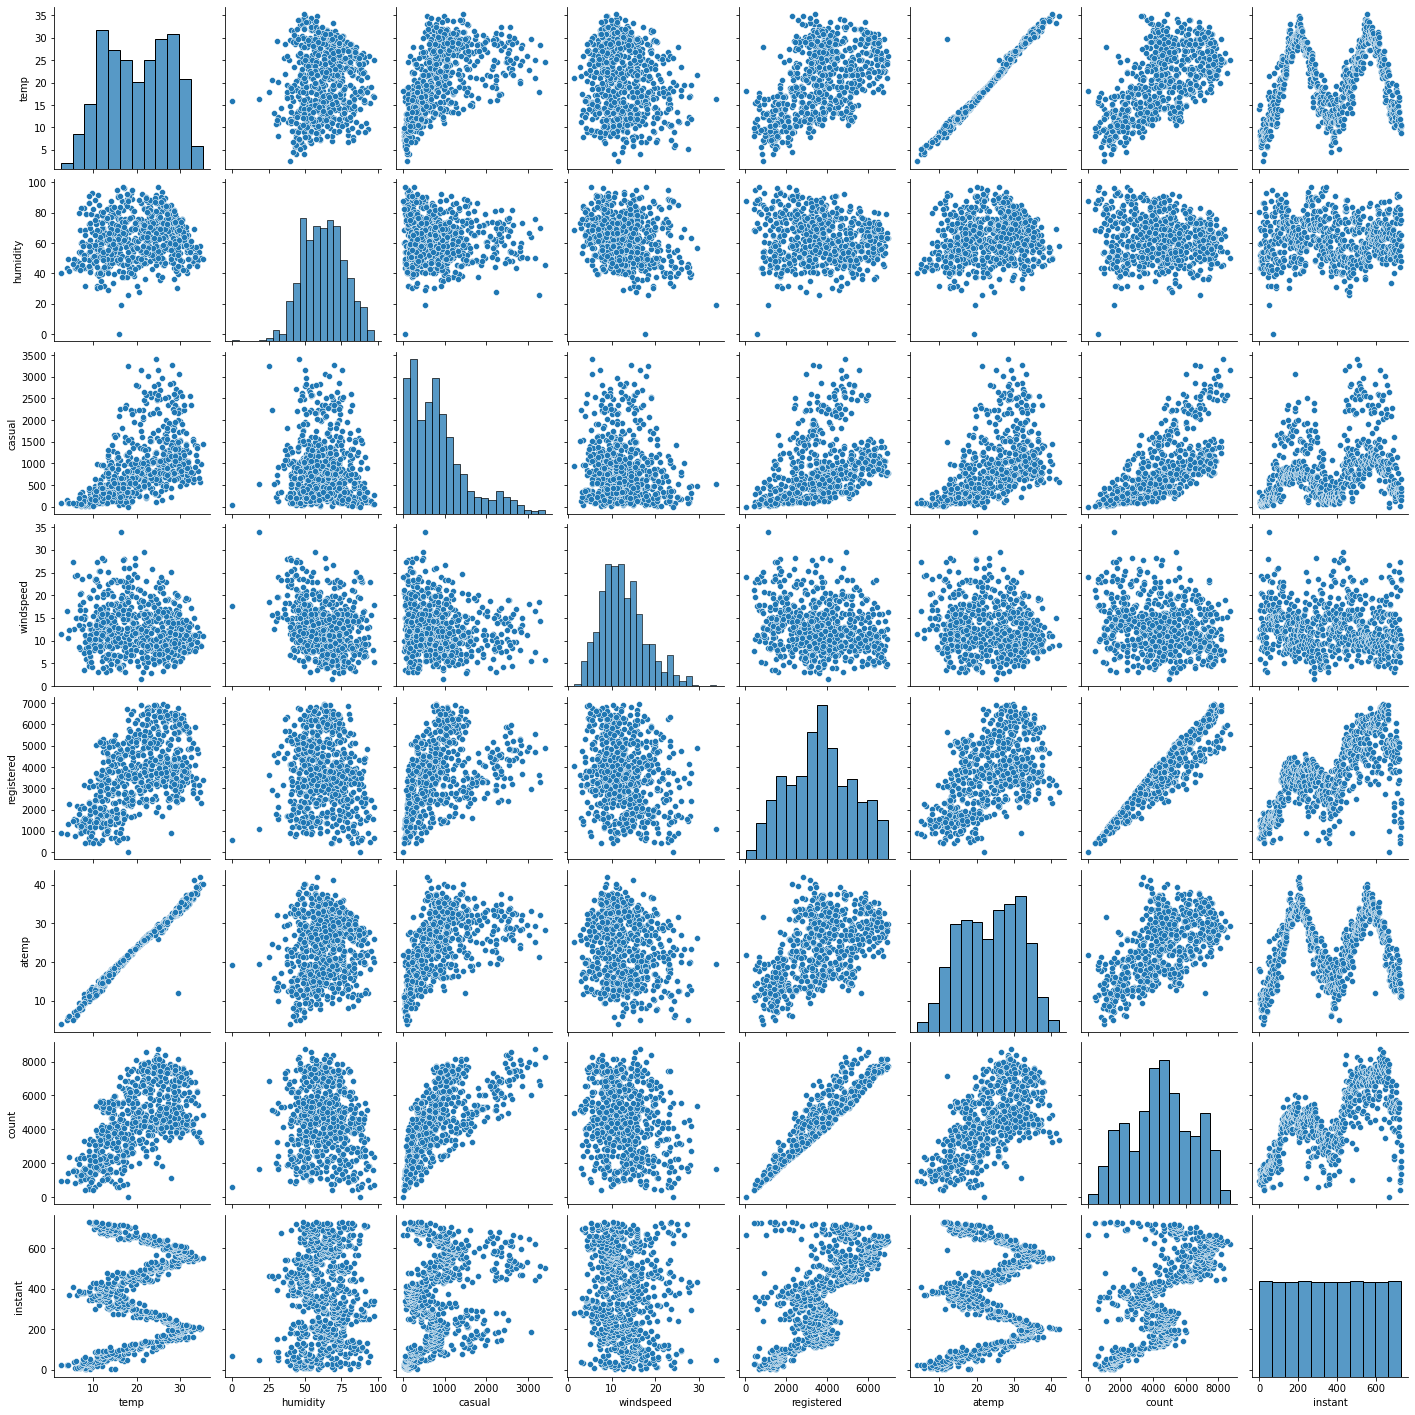

In [87]:
sns.pairplot(bBike, vars=["temp", "humidity",'casual','windspeed','registered','atemp','count','instant'])
plt.show()

###### As per the plot, we can see that temperature is most correlated  attribute 

##### -- Data Visualising for each category]

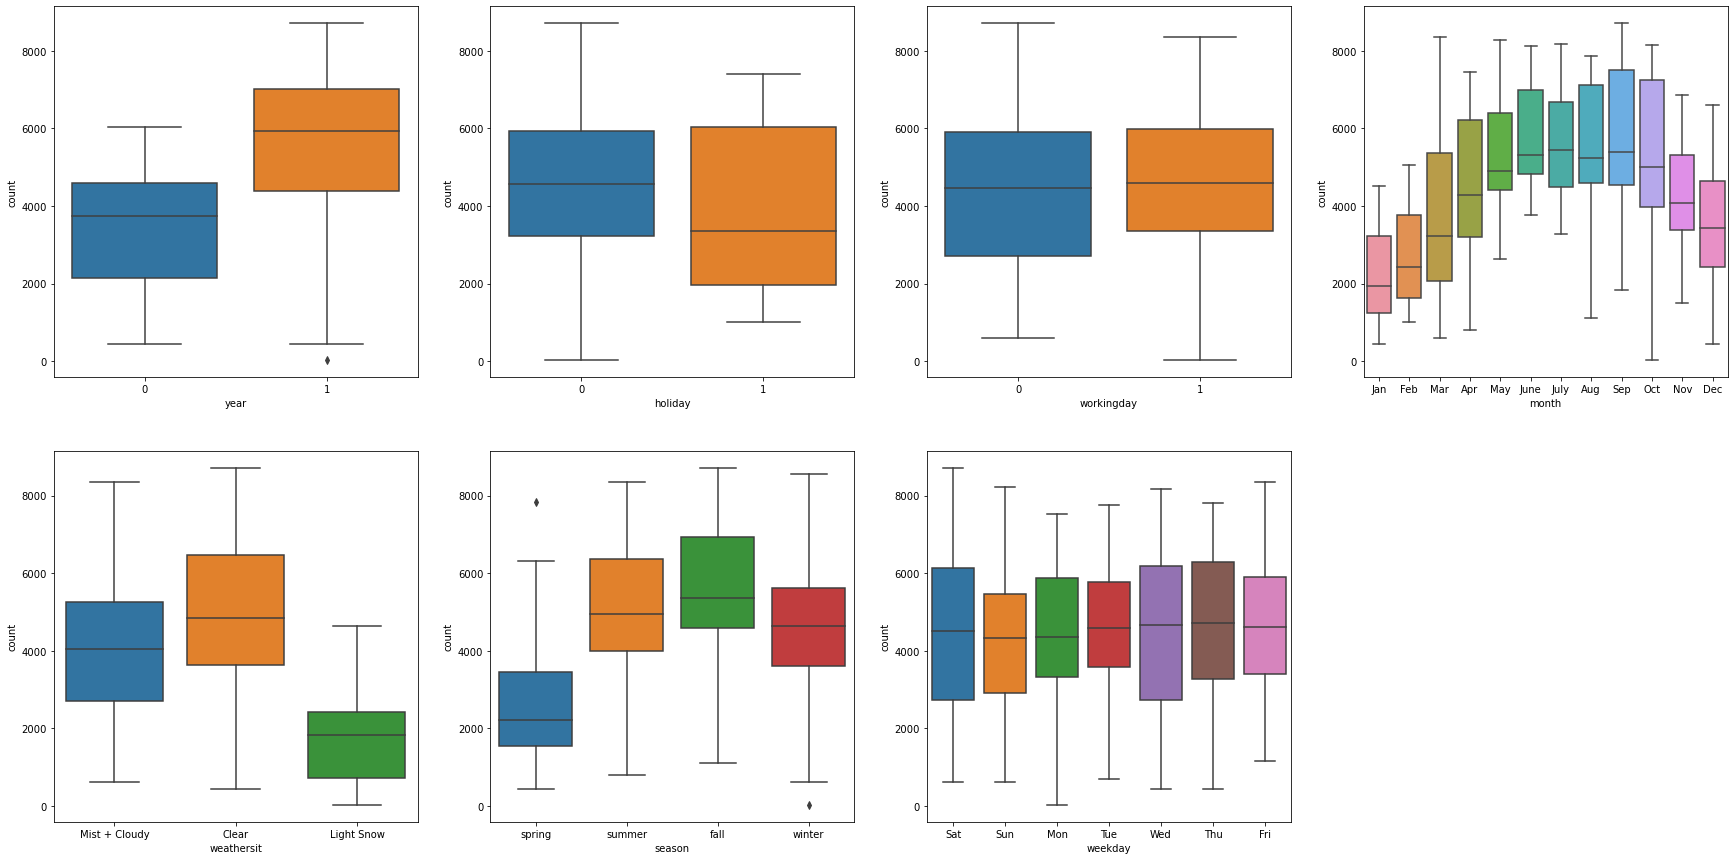

In [88]:
plt.figure(figsize=(30, 15))
plt.subplot(2,4,1)
sns.boxplot(x = 'year', y = 'count', data = bBike)
plt.subplot(2,4,2)
sns.boxplot(x = 'holiday', y = 'count', data = bBike)
plt.subplot(2,4,3)
sns.boxplot(x = 'workingday', y = 'count', data = bBike)
plt.subplot(2,4,4)
sns.boxplot(x = 'month', y = 'count', data = bBike)
plt.subplot(2,4,5)
sns.boxplot(x = 'weathersit', y = 'count', data = bBike)
plt.subplot(2,4,6)
sns.boxplot(x = 'season', y = 'count', data = bBike)
plt.subplot(2,4,7)
sns.boxplot(x = 'weekday', y = 'count', data = bBike)
plt.show()

#### The above plots shows the meaningful data with target variable.

1. People taking bike rentals mostly on Fall season and in the summer
2. In 2019 more people took bike rent compare to 2018.
3. On partly cloudy day, people use to take bike on rent 
4. People took bike rent on Sat, Wed and Thru day in the week. 

#####  Let Plot the bar plot to understand more data with each Field

In [89]:
def show_barplot (row_name,col_name):
    sns.barplot(x=row_name, y=col_name, data=bBike)
    plt.show()

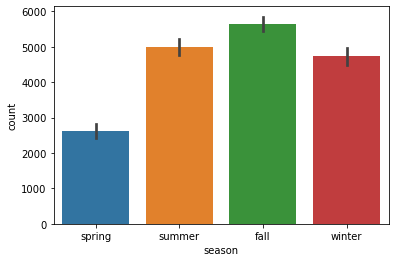

In [90]:
# Bar plot for Season Vs Bike rent count
show_barplot("season","count")

###### During the Fall season, people were taking more bike rentals compare to other season.

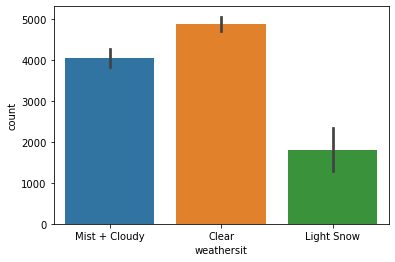

In [91]:
# Bar plot for Weathersit Vs Bike rent count
show_barplot("weathersit","count")

###### During the Clear weathersit, people were taking more bike rentals compare to other weathersit.

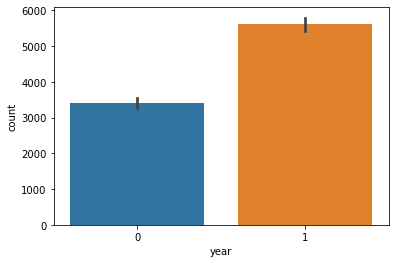

In [92]:
# Bar plot for year Vs Bike rent count
show_barplot("year","count")

###### During the 2019, people were taking more bike rentals compare to 2018.

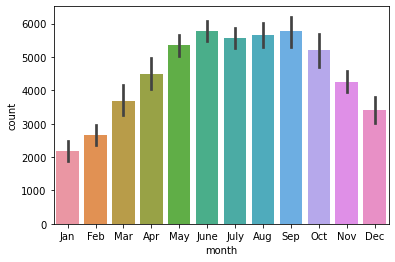

In [93]:
# Bar plot for Month Vs Bike rent count
show_barplot("month","count")

##### During the Sep, people were taking more bike rentals compare to other months.

In [94]:
def scatterplot(row_name,col_name):
    sns.scatterplot(x=row_name, y=col_name, data=bBike)
    plt.show()

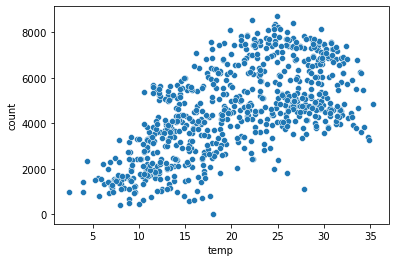

In [95]:
# Bar plot for temp Vs Bike rent count
scatterplot("temp","count")

#### People were taking bike rentals are in higher temperatures

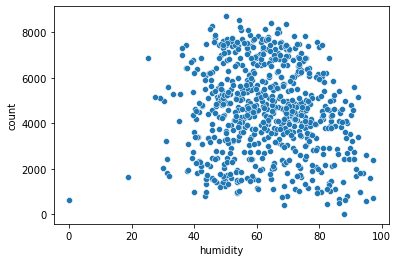

In [96]:
# Bar plot for Humidity Vs Bike rent count
scatterplot("humidity","count")

###### People were taking bike rentals are in higher humidity temperatures

##### --- Heat Map for corelation

<AxesSubplot:>

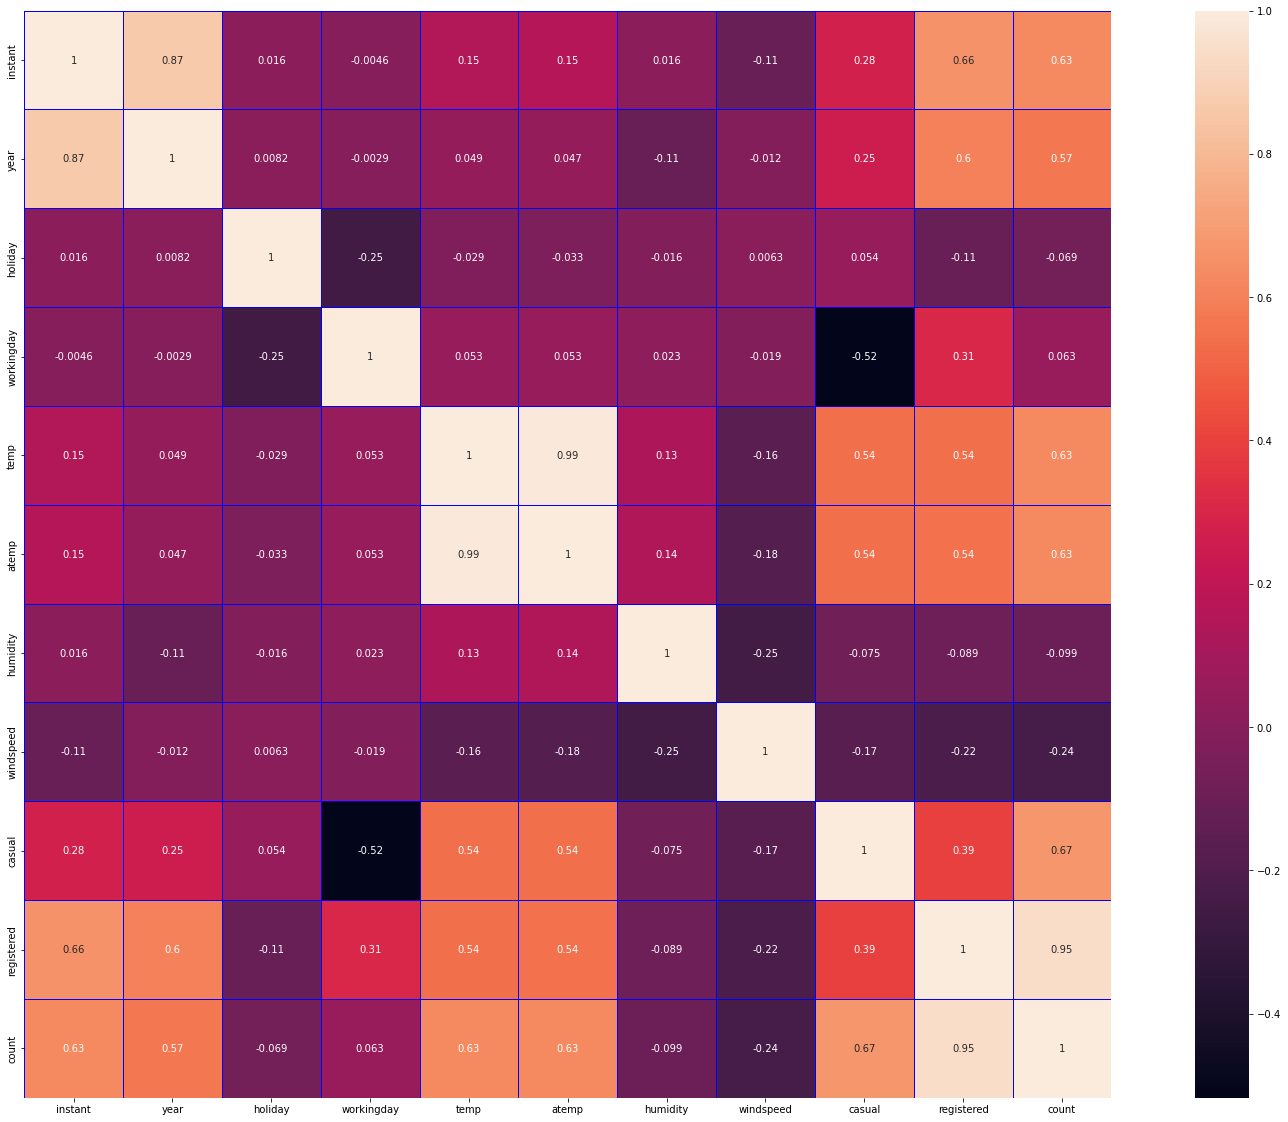

In [97]:
plt.figure(figsize=(30,20))
sns.heatmap(bBike.corr(),linewidths=1, fmt='.2g',annot=True , linecolor='blue',square= True,)

##### -- Some of the  Variable are not corelated.
      The above plot and heat map shows that all the Index are not corelated with count of bike rent.

##### We the help of plot and heat map, we can say that many col. are not useful hence we can drop the col like instant, dteday, casual, registered

In [98]:
# Drop unnecessary col
drop_col = ['instant','dteday','casual', 'registered','atemp']
bBike = bBike.drop(drop_col,axis=1)
bBike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


In [99]:
# Data Type of all the col.
bBike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   humidity    730 non-null    float64
 9   windspeed   730 non-null    float64
 10  count       730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


##  Data Readiness

###### Create dummy variables

In [100]:
# Assign Dummpy values
months=pd.get_dummies(bBike.month,drop_first=True)
weekdays=pd.get_dummies(bBike.weekday,drop_first=True)
weather_sit=pd.get_dummies(bBike.weathersit,drop_first=True)
seasons=pd.get_dummies(bBike.season,drop_first=True)
year=pd.get_dummies(bBike.year,drop_first=True)

In [101]:
#Add the dummpy col. in main dataframe
bBike = pd.concat([months,weekdays,weather_sit,seasons,bBike],axis=1)
bBike.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


In [102]:
# Drop some dummpy variable 
bBike.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)
bBike.head()


,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600


###### Lets check  correlation between variables again

In [103]:
# Lets check shape
bBike.shape

(730, 29)

<AxesSubplot:>

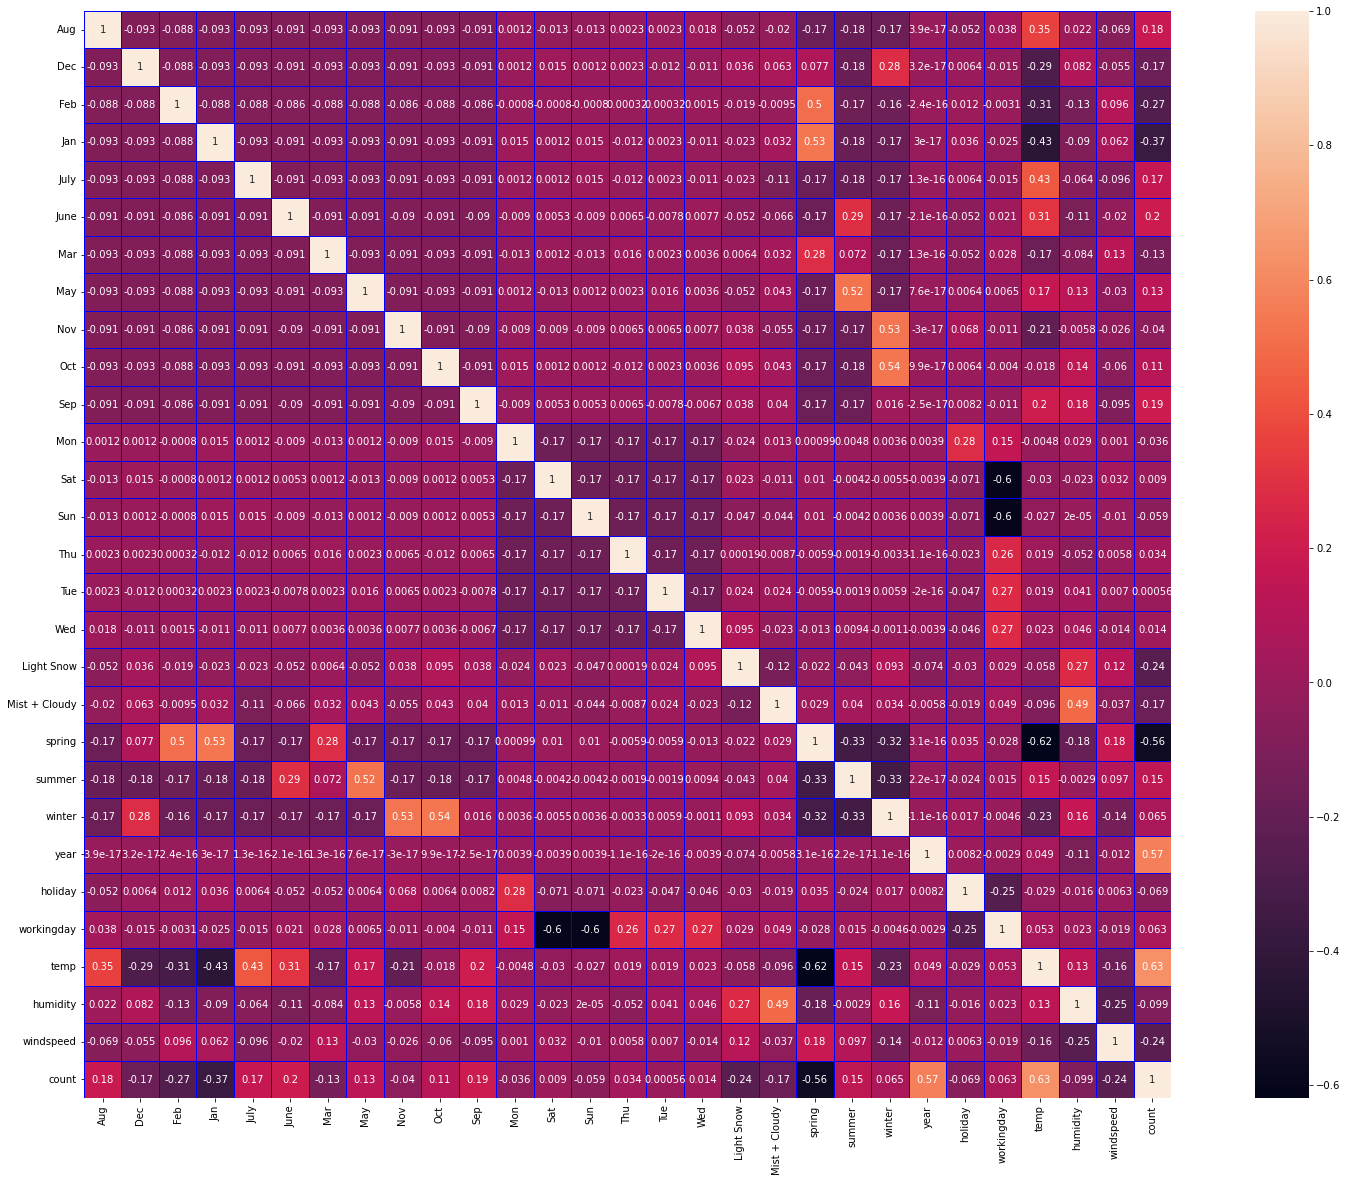

In [104]:
plt.figure(figsize=(30,20))
sns.heatmap(bBike.corr(),linewidths=1, fmt='.2g',annot=True , linecolor='blue',square= True,)

###### The observation is that temperature,Summer season,June to october months are one of the best correlation with the 'count' Col.Which help to increase the rental bike count

# Separate the Data for Traning and Testing Set

In [105]:
# We derive the train and test data
bBike_train, bBike_test = train_test_split(bBike, train_size = 0.7, random_state = 100)

In [106]:
# After splits let check the shape of train and test shape.
bBike_train.shape


(510, 29)

In [107]:
bBike_test.shape

(220, 29)

######  Scaling the Data set

###### Min-Max scaling (Normalisation):Between 0 and 1

In [108]:
#Instantiate an object
scaler = MinMaxScaler()

#Create a list of numeric variables
num_vars=['temp','humidity','windspeed','count']

#Fit on data
bBike_train[num_vars] = scaler.fit_transform(bBike_train[num_vars])
bBike_train.head()

C:\Users\Nishant\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed,count
576,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0.815169,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0.442393,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0.245101,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0.395666,0.504508,0.188475,0.482973
111,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0.345824,0.751824,0.380981,0.191095


In [109]:
#Check the min and Max
bBike_train.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed,count
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,...,0.243137,0.247059,0.247059,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499
std,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,...,0.429398,0.431725,0.431725,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Now all the values are mapped 

<AxesSubplot:>

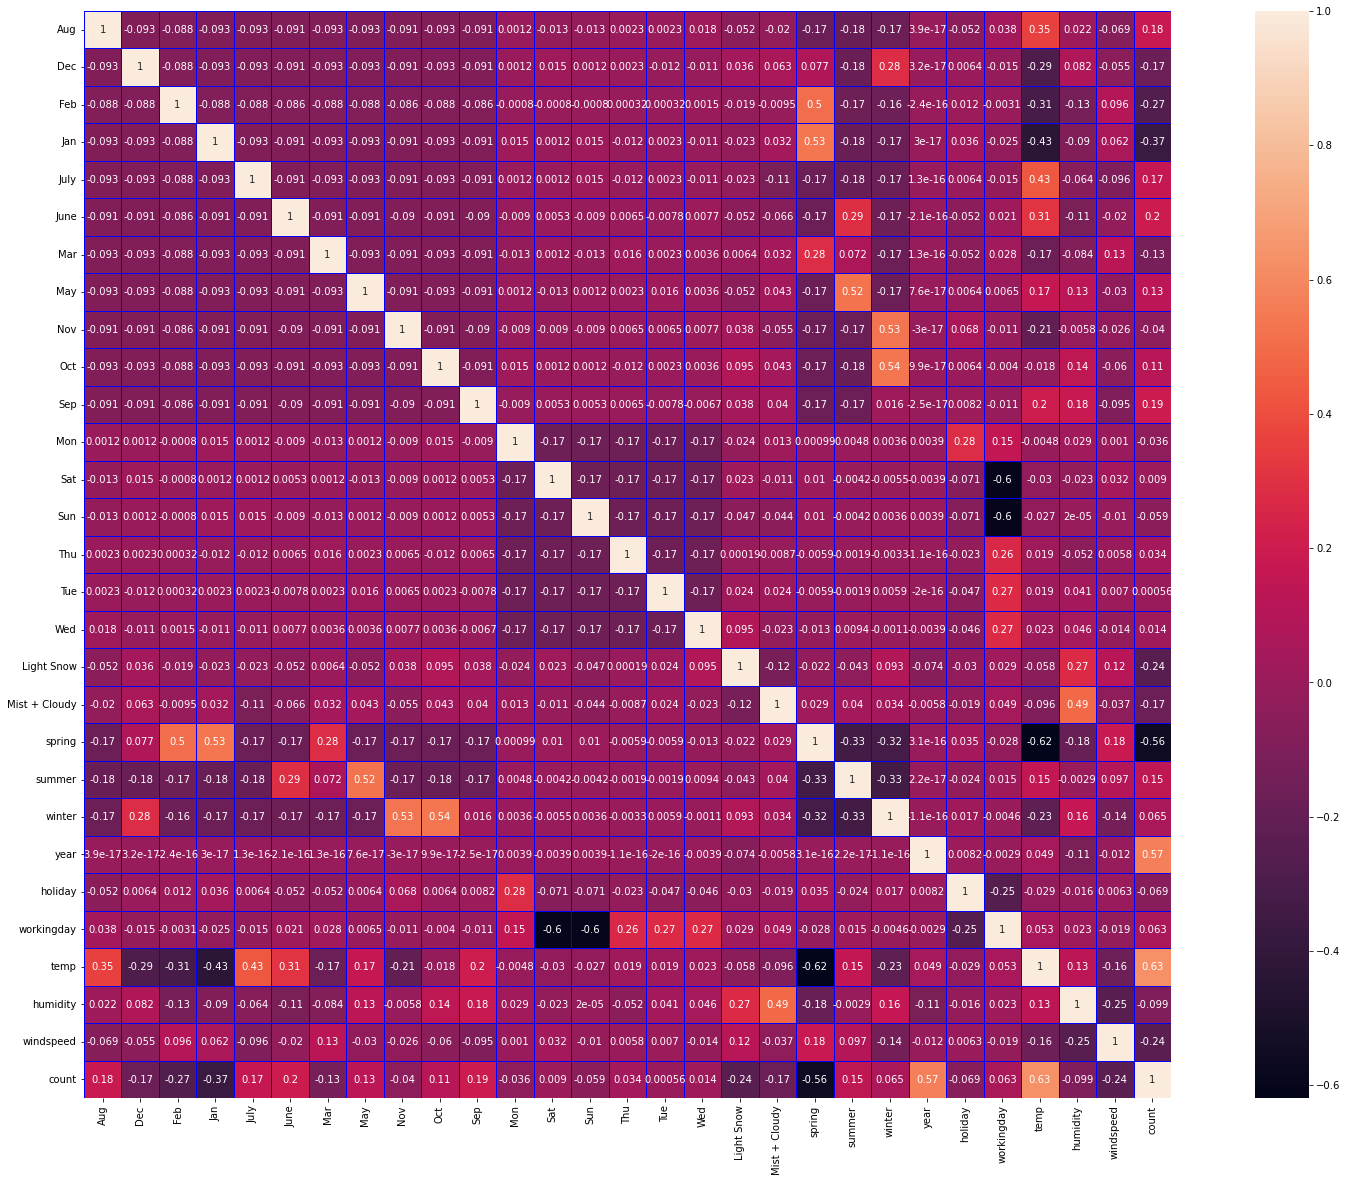

In [110]:
plt.figure(figsize=(30,20))
sns.heatmap(bBike.corr(),linewidths=1, fmt='.2g',annot=True , linecolor='blue',square= True,)

#####  The heatmap we can observe that temp, year are correlated to the 'count' col.

### Now Sepreate the set between X and Y for model building

In [111]:
y_train = bBike_train.pop('count')
X_train = bBike_train

# Building linear model 

In [112]:
# Let check the RFE  15
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train, y_train)

C:\Users\Nishant\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [113]:
#Columns where RFE support  True value
col = X_train.columns[rfe.support_]
col

Index(['Jan', 'July', 'Sep', 'Sat', 'Sun', 'Light Snow', 'Mist + Cloudy',
       'spring', 'winter', 'year', 'holiday', 'workingday', 'temp', 'humidity',
       'windspeed'],
      dtype='object')

In [114]:
X_train_rfe = X_train[col]

In [115]:
X_train_rfe = sm.add_constant(X_train_rfe)

C:\Users\Nishant\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [116]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [117]:
#Run the Linear model.
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.2
Date:                Mon, 09 May 2022   Prob (F-statistic):          9.51e-190
Time:                        00:25:10   Log-Likelihood:                 513.67
No. Observations:                 510   AIC:                            -997.3
Df Residuals:                     495   BIC:                            -933.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2521      0.025      9.930      0.000       0.202       0.302
Jan              -0.0405      0.017     -2.321      0.021      -0.075      -0.006
July             -0.0746      0.017     -4.368      0.000      -0.108      -0.041
Sep               0.0599      0.015      3.896      0.000       0.030       0.090
Sat               0.1068      0.011      9.382      0.000       0.084       0.129
Sun               0.0537      0.012      4.494      0.000       0.030       0.077
Light Snow       -0.2525      0.026     -9.613      0.000      -0.304      -0.201
Mist + Cloudy    -0.0577      0.010     -5.513      0.000      -0.078      -0.037
spring           -0.0992      0.015     -6.499      0.000      -0.129      -0.069
winter            0.0517      0.012      4.169      0.000       0.027       0.076
year              0.2317      0.008     28.655      0.000       0.216       0.248
holiday          -0.0052      0.021     -0.246      0.806      -0.047       0.037
workingday        0.0968      0.009     10.442      0.000       0.079       0.115
temp              0.4596      0.031     14.626      0.000       0.398       0.521
humidity         -0.1434      0.038     -3.822      0.000      -0.217      -0.070
windspeed        -0.1758      0.026     -6.875      0.000      -0.226      -0.126
==============================================================================
Omnibus:                       62.892   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.883
Skew:                          -0.628   Prob(JB):                     1.91e-35
Kurtosis:                       5.438   Cond. No.                     1.28e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.11e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Checking VIF of the model

The common heuristic we follow for the VIF values is:

> 10:  Definitely high VIF value and the variable should be eliminated.

> 5:  Can be okay, but it is worth inspecting.

< 5: Good VIF value. No need to eliminate this variable.

High p-value and low VIF; can be dropped

In [118]:
#Drop the constant term B0
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [119]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,workingday,41.54
3,Sat,10.13
4,Sun,9.81
12,temp,3.19
7,spring,2.71
10,holiday,2.58
13,humidity,1.89
8,winter,1.81
6,Mist + Cloudy,1.57
0,Jan,1.55


In [120]:
#Drop January
X_train_new1 = X_train_rfe.drop(["Jan"], axis = 1)

In [121]:
# Build model
X_train_lm1 = sm.add_constant(X_train_new1)
lm1 = sm.OLS(y_train,X_train_lm1).fit()
lm1.summary()

C:\Users\Nishant\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.7
Date:                Mon, 09 May 2022   Prob (F-statistic):          9.38e-190
Time:                        00:25:10   Log-Likelihood:                 510.91
No. Observations:                 510   AIC:                            -993.8
Df Residuals:                     496   BIC:                            -934.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2435      0.025      9.653      0.000       0.194       0.293
July             -0.0782      0.017     -4.571      0.000      -0.112      -0.045
Sep               0.0591      0.015      3.829      0.000       0.029       0.089
Sat               0.1046      0.011      9.177      0.000       0.082       0.127
Sun               0.0521      0.012      4.349      0.000       0.029       0.076
Light Snow       -0.2499      0.026     -9.482      0.000      -0.302      -0.198
Mist + Cloudy    -0.0578      0.011     -5.501      0.000      -0.078      -0.037
spring           -0.1080      0.015     -7.280      0.000      -0.137      -0.079
winter            0.0558      0.012      4.528      0.000       0.032       0.080
year              0.2308      0.008     28.455      0.000       0.215       0.247
holiday          -0.0080      0.021     -0.374      0.709      -0.050       0.034
workingday        0.0948      0.009     10.227      0.000       0.077       0.113
temp              0.4776      0.031     15.613      0.000       0.418       0.538
humidity         -0.1482      0.038     -3.938      0.000      -0.222      -0.074
windspeed        -0.1687      0.025     -6.616      0.000      -0.219      -0.119
==============================================================================
Omnibus:                       60.956   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.410
Skew:                          -0.606   Prob(JB):                     1.09e-34
Kurtosis:                       5.427   Cond. No.                     5.77e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.44e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [122]:
#Drop the constant term B0
X_train_lm1 = X_train_lm1.drop(['const'], axis=1)

In [123]:
#Caluculate the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()
vif_data['Features'] = X.columns
  
# calculating VIF for each feature
vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,workingday,41.54
3,Sat,10.13
4,Sun,9.81
12,temp,3.19
7,spring,2.71
10,holiday,2.58
13,humidity,1.89
8,winter,1.81
6,Mist + Cloudy,1.57
0,Jan,1.55


In [124]:
# Let drop humidity
X_train_new2 = X_train_lm1.drop(["humidity"], axis = 1)

In [125]:
#Build a model
X_train_lm2 = sm.add_constant(X_train_new2)
lm2 = sm.OLS(y_train,X_train_lm2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     214.3
Date:                Mon, 09 May 2022   Prob (F-statistic):          1.26e-187
Time:                        00:25:10   Log-Likelihood:                 503.06
No. Observations:                 510   AIC:                            -980.1
Df Residuals:                     497   BIC:                            -925.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1795      0.020      9.173

C:\Users\Nishant\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [126]:
#Drop the constant
X_train_lm2=X_train_lm2.drop(['const'],axis=1)

In [127]:
#Caluculate the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()
vif_data['Features'] = X.columns
  
# calculating VIF for each feature
vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,workingday,41.54
3,Sat,10.13
4,Sun,9.81
12,temp,3.19
7,spring,2.71
10,holiday,2.58
13,humidity,1.89
8,winter,1.81
6,Mist + Cloudy,1.57
0,Jan,1.55


In [128]:
# Rebuild the model holiday
X_train_new3=X_train_lm2.drop(['holiday'],axis=1)

In [129]:
X_train_lm3 = sm.add_constant(X_train_new3)
lm3 = sm.OLS(y_train,X_train_lm3).fit()
lm3.summary()

C:\Users\Nishant\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     214.3
Date:                Mon, 09 May 2022   Prob (F-statistic):          1.26e-187
Time:                        00:25:11   Log-Likelihood:                 503.06
No. Observations:                 510   AIC:                            -980.1
Df Residuals:                     497   BIC:                            -925.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1553      0.035      4.475      0.000       0.087       0.224
July             -0.0711      0.017     -4.120      0.000      -0.105      -0.037
Sep               0.0559      0.016      3.573      0.000       0.025       0.087
Sat               0.1148      0.028      4.171      0.000       0.061       0.169
Sun               0.0578      0.028      2.089      0.037       0.003       0.112
Light Snow       -0.2907      0.025    -11.824      0.000      -0.339      -0.242
Mist + Cloudy    -0.0816      0.009     -9.366      0.000      -0.099      -0.064
spring           -0.1118      0.015     -7.441      0.000      -0.141      -0.082
winter            0.0468      0.012      3.808      0.000       0.023       0.071
year              0.2344      0.008     28.661      0.000       0.218       0.250
workingday        0.1034      0.026      3.967      0.000       0.052       0.155
temp              0.4493      0.030     14.895      0.000       0.390       0.509
windspeed        -0.1404      0.025     -5.657      0.000      -0.189      -0.092
==============================================================================
Omnibus:                       64.352   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.995
Skew:                          -0.644   Prob(JB):                     4.04e-36
Kurtosis:                       5.452   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [130]:
X_train_lm3=X_train_lm3.drop(['const'],axis=1)

In [131]:
vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,workingday,13.12
10,temp,12.38
11,windspeed,4.48
2,Sat,3.77
3,Sun,3.54
6,spring,2.44
8,year,2.07
7,winter,1.78
5,Mist + Cloudy,1.58
0,July,1.37


In [132]:
#Drop July
X_train_new4= X_train_lm3.drop(['windspeed'], axis=1)

In [133]:
#Build a model
X_train_lm4=sm.add_constant(X_train_new4)
lm4=sm.OLS(y_train,X_train_lm4).fit()
lm4.summary()

C:\Users\Nishant\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     217.3
Date:                Mon, 09 May 2022   Prob (F-statistic):          4.25e-182
Time:                        00:25:11   Log-Likelihood:                 487.14
No. Observations:                 510   AIC:                            -950.3
Df Residuals:                     498   BIC:                            -899.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0945      0.034      2.778      0.006       0.028       0.161
July             -0.0670      0.018     -3.771      0.000      -0.102      -0.032
Sep               0.0641      0.016      3.989      0.000       0.033       0.096
Sat               0.1150      0.028      4.053      0.000       0.059       0.171
Sun               0.0603      0.029      2.114      0.035       0.004       0.116
Light Snow       -0.3046      0.025    -12.081      0.000      -0.354      -0.255
Mist + Cloudy    -0.0801      0.009     -8.923      0.000      -0.098      -0.062
spring           -0.1116      0.015     -7.210      0.000      -0.142      -0.081
winter            0.0554      0.013      4.412      0.000       0.031       0.080
year              0.2333      0.008     27.682      0.000       0.217       0.250
workingday        0.1066      0.027      3.969      0.000       0.054       0.159
temp              0.4689      0.031     15.183      0.000       0.408       0.530
==============================================================================
Omnibus:                       72.585   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.825
Skew:                          -0.684   Prob(JB):                     1.23e-45
Kurtosis:                       5.803   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [134]:
#Drop constant
X_train_lm4= X_train_lm4.drop(['const'], axis=1)


In [135]:
vif = pd.DataFrame()
X =X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,temp,12.29
9,workingday,11.82
2,Sat,3.41
3,Sun,3.25
6,spring,2.34
8,year,2.06
7,winter,1.77
5,Mist + Cloudy,1.58
0,July,1.36
1,Sep,1.19


In [136]:
#Drop July
X_train_new5=X_train_lm4.drop(['July'], axis=1)

In [137]:
#Building a model
X_train_lm5= sm.add_constant(X_train_new5)
lm5=sm.OLS(y_train,X_train_lm5).fit()
print(lm5.summary())

C:\Users\Nishant\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     231.5
Date:                Mon, 09 May 2022   Prob (F-statistic):          2.94e-180
Time:                        00:25:11   Log-Likelihood:                 479.96
No. Observations:                 510   AIC:                            -937.9
Df Residuals:                     499   BIC:                            -891.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1117      0.034      3.271

In [138]:
#Drop the constant
X_train_lm7=X_train_lm5.drop(['const'],axis=1)

In [139]:
# Calculate the VIFs 
vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,workingday,11.58
9,temp,10.88
1,Sat,3.37
2,Sun,3.21
5,spring,2.34
7,year,2.06
6,winter,1.76
4,Mist + Cloudy,1.57
0,Sep,1.15
3,Light Snow,1.07


In [140]:
#Drop temp for the lm4 model 
X_train_new6=X_train_lm4.drop(['temp'], axis=1)

In [141]:
#Building a model
X_train_lm6= sm.add_constant(X_train_new6)
lm6=sm.OLS(y_train,X_train_lm6).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     147.9
Date:                Mon, 09 May 2022   Prob (F-statistic):          2.96e-142
Time:                        00:25:11   Log-Likelihood:                 390.14
No. Observations:                 510   AIC:                            -758.3
Df Residuals:                     499   BIC:                            -711.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3956      0.033     11.846

C:\Users\Nishant\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


# Residual Analysis

In [142]:
X_train_lm5

,const,Sep,Sat,Sun,Light Snow,Mist + Cloudy,spring,winter,year,workingday,temp
576,1.0,0,0,0,0,0,0,0,1,1,0.815169
426,1.0,0,1,0,0,1,1,0,1,0,0.442393
728,1.0,0,0,1,0,0,1,0,1,0,0.245101
482,1.0,0,1,0,0,1,0,0,1,0,0.395666
111,1.0,0,0,0,0,1,0,0,0,1,0.345824
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,0,0,0,0,0,0,0,1,1,0.863973
53,1.0,0,0,0,0,0,1,0,0,1,0.202618
350,1.0,0,1,0,0,1,0,1,0,0,0.248216
79,1.0,0,0,0,0,1,0,0,0,1,0.462664


In [143]:
#y train predicted
y_train_pred = lm5.predict(X_train_lm5)

C:\Users\Nishant\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

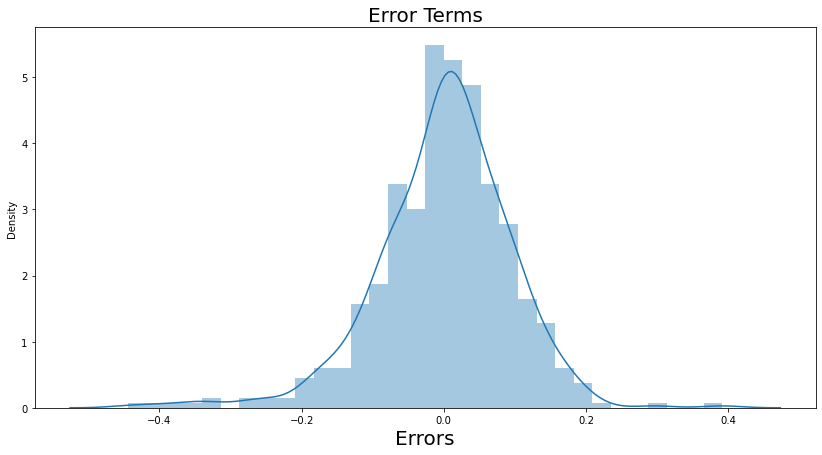

In [144]:
fig = plt.figure()
plt.figure(figsize=(14,7))
sns.distplot((y_train - y_train_pred))
plt.title('Error Terms', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 20) 
plt.show()

##### Error are normally distributed

# Making Predictions

##### Applying scaling 

In [145]:
num_vars=['temp','humidity','windspeed','count']
bBike_test[num_vars] = scaler.transform(bBike_test[num_vars])
bBike_test.head()

C:\Users\Nishant\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed,count
184,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0.831783,0.657364,0.084219,0.692706
535,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0.901354,0.610133,0.153728,0.712034
299,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0.511964,0.837699,0.334206,0.303382
221,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.881625,0.437098,0.339570,0.547400
152,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0.817246,0.314298,0.537414,0.569029


In [146]:
#Dividing into X_test and y_test
y_test = bBike_test.pop('count')
X_test = bBike_test
X_test.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,Mist + Cloudy,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,...,0.318182,0.254545,0.263636,0.236364,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293
std,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,...,0.466833,0.436599,0.441609,0.425817,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474


In [147]:
X_train_new5.columns

Index(['Sep', 'Sat', 'Sun', 'Light Snow', 'Mist + Cloudy', 'spring', 'winter',
       'year', 'workingday', 'temp'],
      dtype='object')

In [148]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new5.columns]

# Adding a constant variable 
X_test_new1 = sm.add_constant(X_test_new)
X_test_new1.head()

C:\Users\Nishant\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,Sep,Sat,Sun,Light Snow,Mist + Cloudy,spring,winter,year,workingday,temp
184,1.0,0,0,0,0,1,0,0,0,0,0.831783
535,1.0,0,0,0,0,0,0,0,1,1,0.901354
299,1.0,0,0,0,0,1,0,1,0,1,0.511964
221,1.0,0,0,0,0,0,0,0,0,1,0.881625
152,1.0,0,0,0,0,0,0,0,0,1,0.817246


In [149]:
# Y predictions
y_pred = lm5.predict(X_test_new1)

In [150]:
#Evaluate R-square for test
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8108451834946024

###### R-squared = (TSS-RSS)/TSS

In [155]:
Adj_r2=1-(1-0.8115083)*(11-1)/(11-1-1)
print(Adj_r2)

0.7905647777777778


#### R-squared 

# Model Evaluation

Text(0, 0.5, 'y_pred')

<Figure size 432x288 with 0 Axes>

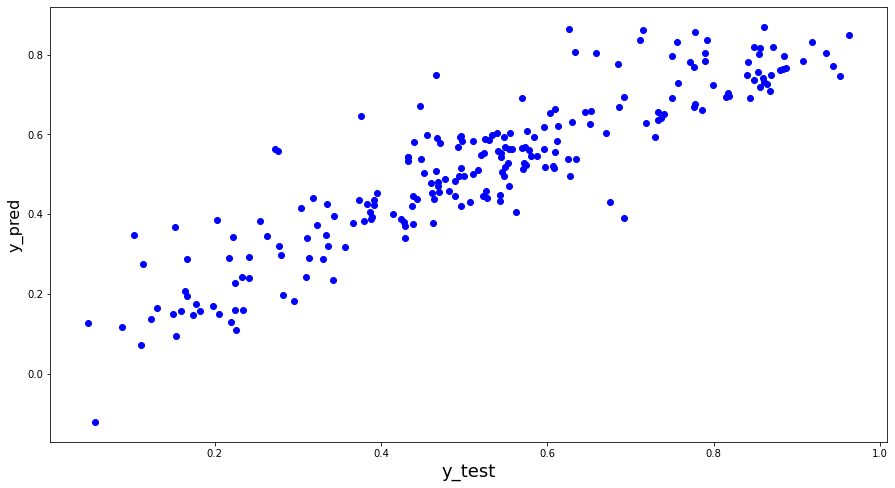

In [151]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.figure(figsize=(15,8))
plt.scatter(y_test,y_pred,color='blue')
fig.suptitle('y_test vs y_pred', fontsize=20)             
plt.xlabel('y_test', fontsize=18)                         
plt.ylabel('y_pred', fontsize=16) 

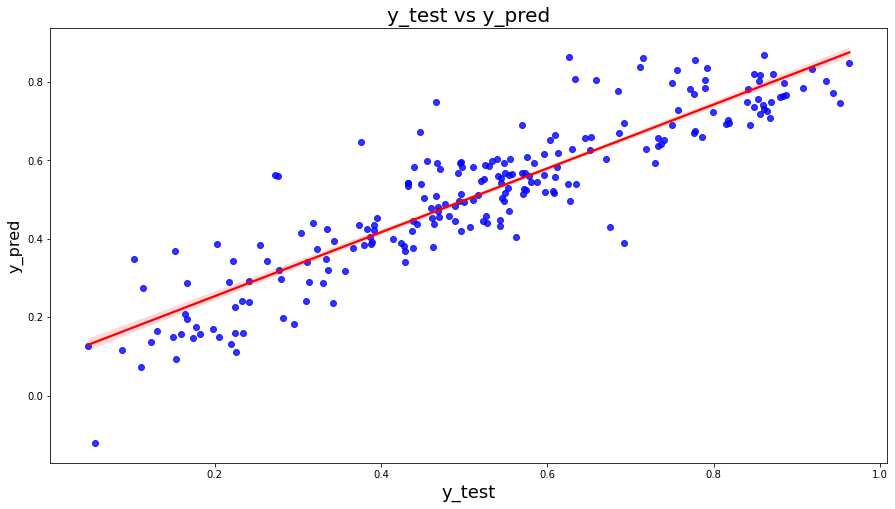

In [154]:
#Regression plot
plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"},scatter=True,label="Model Evaluation")

plt.title('y_test vs y_pred', fontsize=20)            
plt.xlabel('y_test', fontsize=18)                         
plt.ylabel('y_pred', fontsize=16)                        
plt.show()

# Final result:

Train R^2 : 0.81
- Train Adjusted R^2 : 0.79
- Test R^2: 0.81
- Test Adjusted R^2: 0.79

# We can said that it is the best model 

# Resultant 

- We got at a very best fitted model for the the demand of shared bike.
- We observed that temperature attribute cofficient is in the higher side.
- Boom bikes should focus on temprature attribute,but due to Covid pandemic we can see fall in the revenue.
- Boom bikes should focus in Summer season especially on weekends because demand will be high that time.
- In Spring season the cofficient is less, So Boom bikes can provide more offers to increase the demand.